# <font color ='lightseagreen'>German Credit Analysis

# <font color='crimson'>Table of Contents

1. [Introduction](German_Credit_Analysis.ipynb#introduction)
2. [Libraries and Dataset](#library)
    1.  [Import Libraries](#import_lib)
    2.  [About the Data](#dataset)
3. [Feature Engineering](#fe)
    1.  [Separating Datasets](#separate)
    2.  [Age Grouping](#age_group)
4. [Exploratory Data Analysis](#eda)
    1.  [Exploring Sex vs. Age](#SexAge)
    2.  [Exploring Sex vs. Job](#SexJob)
    3.  [Exploring Sex vs. Purpose](#SexPurpose)
    4.  [Exploring Sex vs. Housing](#SexHousing)
    5.  [Relationship b/w Sex and Risk](#SexRisk)
    6.  [Credit Distribution](#credit)
    7.  [Exploring Purpse](#PurposeDist)
    8.  [Features behavior by Age Groups](#age_groups)
    9.  [Checking Accounts](#ca)
    10. [Purpose with Risk factor](#PurposeRisk)
    11. [Exploring Saving Accounts](#sa)
    12. [Loan Duration Distribution and density](#duration)
5. [Correlation](#corr)
6. [Data Preprocessing](#preprocessing)
    1.  [Drop unwanted features](#drop)
    2.  [Applying Encoding techniques](#encoding)
    3.  [Scaling the data](#scaling)
    4.  [Define X and y](#Xy)
    5.  [Splitting data into train and test](#split)
7. [Applying Classification Algorithms](#algo)
    1.  [Logistic Regression](#logit)
    2.  [K-Nearest Neighbors](#knn)
    3.  [Gaussian Naive Bayes](#nb)
    4.  [Decision Tree](#tree)
    5.  [Random Forest](#forest)
    6.  [XGBoost](#xgboost)
    7.  [Bagging](#bagging)
    8.  [AdaBoost](#ada)
    9.  [Extra-Tree](#xtra)
    10. [Voting Classifier](#voting)
    11. [Comparing Algorithms](#compare)
8. [Finalyzing the model](#save)

# <a id='introduction'></a>1. Introduction

**Context**

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

**Content**

It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

>- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)


# <a id='library'></a>2. Importing necessary libraries and dataset 

## <a id='import_lib'></a> 2a. Importing Libraries

In [1]:
# Importing libraries

import time

start_time = time.time()

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <a id='dataset'></a>2b. About Dataset

In [2]:
# Import Data

df = pd.read_csv('german_credit_data_with_risk.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


### Checking Missing Values

In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Statistical View of Dataset

In [5]:
df.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


<font color='royalblue'>**Initial Observations of data:**</font>

- Shape of the data is **1000 rows and 10 cols**
- Data consists of **4 numerical and 6 categorical**
- There are **missing data** for **Saving accounts and Checking account** features
- **Risk** is the **target** variable
- **Average age** of borrowers is **35.55**
- There are **2 times more males than females**
- **Mostly** borrowers do have **2 jobs**
- **Mostly** borrowers do have **own housing**
- On an **average**, the amount given for **credit is 3271.26**
- **Average duration** of loan period is **20.90 months**
- **Majority of the loans** taken for **car purpose**
- **Good risk** are more than **2 times** than **bad risk**

In [6]:
# Renaming few columns to get quick access while writing codes

df.rename(columns={'Saving accounts': 'Saving_accounts',
                  'Checking account':'Checking_account',
                  'Credit amount':'Credit_amount'}, inplace=True)

In [7]:
# columns

df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

### Distribution of Target variable

Text(0.5, 1.0, 'Distribution of Target Variable')

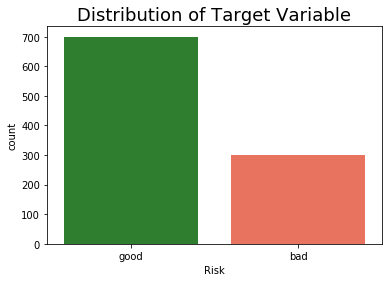

In [8]:
sns.countplot(df.Risk, palette=['forestgreen','tomato'])
plt.title('Distribution of Target Variable', size=18)

- **Above plot** indicates that **good risk is 2 times as compare to bad risk**


# <a id='fe'></a>3. Feature Engineering

## <a id='separate'></a>3a. Separating dataset based on Risk and Sex

In [9]:
# Let's separate good risk data and bad risk data

good_risk_data = df[df.Risk=='good']
bad_risk_data = df[df.Risk=='bad']

# let's separate credit amount for male, female and total

male_credit = df[df.Sex=='male'].Credit_amount.values
female_credit = df[df.Sex=='female'].Credit_amount.values
total_credit = df.Credit_amount.values

## <a id='age_group'></a>3b. Age Grouping

In this section, we will create categorical groups based on age feature.

- **youth** - Age ranging 19-29
- **adult** - Age ranging 30-45
- **mid** - Age ranging 46-60
- **senior** - Age more than 60

In [10]:
df.Age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [11]:
# Grouping of Age

df['age_group'] = pd.cut(df.Age, bins=[19,29,45,60,np.inf], labels=['youth','adult','mid','senior'], 
                         right=True, include_lowest=True)

In [12]:
# Let's check the distribution

df.age_group.value_counts()

adult     443
youth     371
mid       141
senior     45
Name: age_group, dtype: int64

# <a id='eda'></a>4. Exploratory Data Analysis

## <a id='SexAge'></a>4a. Exploring Sex vs. Age

Text(0.5, 1.0, 'total age distribution')

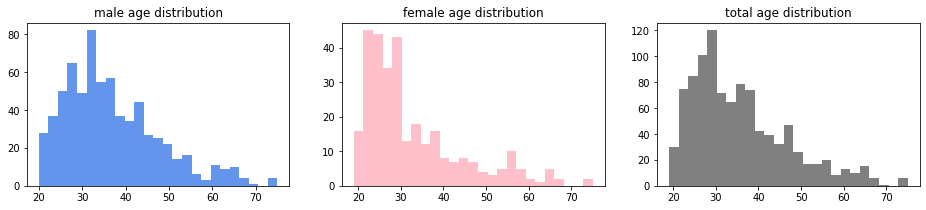

In [13]:
fig, ax = plt.subplots(1,3,figsize=(16,3))

ax[0].hist(df[df.Sex=='male'].Age,color='cornflowerblue', bins=25)
ax[1].hist(df[df.Sex=='female'].Age, color='pink', bins=25)
ax[2].hist(df.Age, color='gray', bins=25)

ax[0].set_title('male age distribution')
ax[1].set_title('female age distribution')
ax[2].set_title('total age distribution')

- Most of the **males applied** for credit loan **age ranging 20s-40s**
- Most **females that applied** credit loan were **less than 30s**

## <a id='SexJob'></a>4b. Exploring Sex vs. Job

Sex    female      male
Job                    
0    0.038710  0.014493
1    0.206452  0.197101
2    0.635484  0.627536
3    0.119355  0.160870


Text(0.5, 1.0, 'How Job is distributed in Sex?')

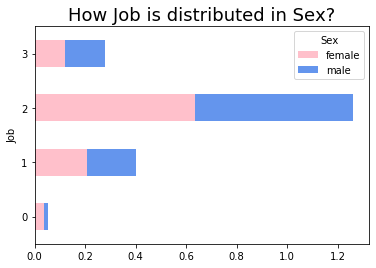

In [14]:
sex_vs_job = pd.crosstab(df.Job, df.Sex, normalize='columns')
print(sex_vs_job)

sex_vs_job.plot(kind='barh', stacked=True, color=['pink','cornflowerblue'])
plt.title('How Job is distributed in Sex?', size=18)

- **Females with no job** are more than **2.5 times as compare to males**
- **males with 3 jobs** are almost **1.3 times more than females**
- **most of borrowers do have 2 jobs**

## <a id='SexPurpose'></a>4c. Exploring Sex vs. Purpose

Sex                    female      male
Purpose                                
business             0.061290  0.113043
car                  0.303226  0.352174
domestic appliances  0.019355  0.008696
education            0.077419  0.050725
furniture/equipment  0.238710  0.155072
radio/TV             0.274194  0.282609
repairs              0.016129  0.024638
vacation/others      0.009677  0.013043


Text(0.5, 1.0, 'Purpose Distribution among Sex')

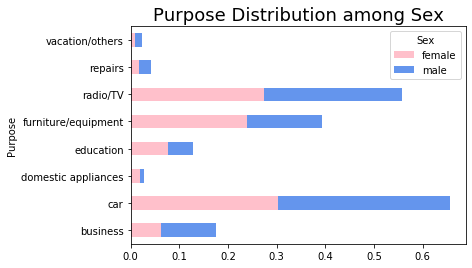

In [15]:
sex_vs_purpose = pd.crosstab(df.Purpose, df.Sex, normalize='columns')
print(sex_vs_purpose)

sex_vs_purpose.plot(kind='barh', stacked=True, color=['pink','cornflowerblue'])
plt.title('Purpose Distribution among Sex', size=18)

- **Male borrowing** for **business loans** are approx. **2 times** as compare to **female**
- **female borrowing** for **furniture/equimen**t is **1.5 times** more than **male**
- **No impact of Sex** in borrowing for Car, domestic appliances, education, radio/tv, vacation/others

## <a id='SexHousing'></a>4d. Exploring Sex vs. Housing

In [16]:
pd.crosstab(df.Housing, df.Sex, normalize='columns')

Sex,female,male
Housing,,
free,0.061290,0.128986
own,0.632258,0.749275
rent,0.306452,0.121739


- **males with free housing borrows twice than females**
- **females with rent housing borrows 2.5 times more than males**

## <a id='SexRisk'></a>4e. Exploring the relationship b/w Sex and Risk

In [17]:
pd.crosstab(df.Risk, df.Sex, normalize='columns')

Sex,female,male
Risk,,
bad,0.351613,0.276812
good,0.648387,0.723188


- **Credit risk is irrespective of Sex**

## <a id='credit'></a>4f. Credit Distribution

### Credit distribution by Sex

Text(0.5, 1.0, 'Distribution Credit Amount for Good vs. Bad risk')

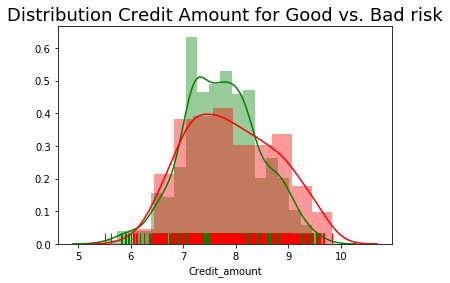

In [18]:
sns.distplot(np.log(good_risk_data.Credit_amount), color='g',rug=True)
sns.distplot(np.log(bad_risk_data.Credit_amount),color='r',rug=True)
plt.title('Distribution Credit Amount for Good vs. Bad risk' ,size=18)

Text(0.5, 1.0, 'total credit distribution')

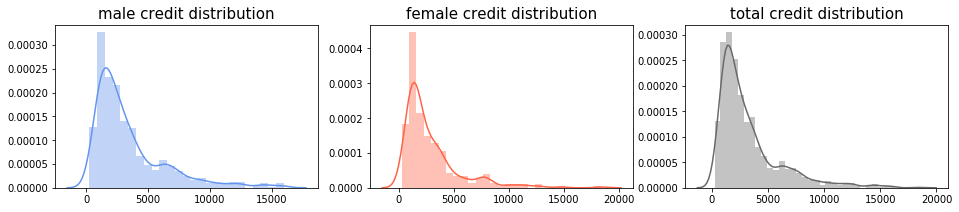

In [19]:
fig, ax = plt.subplots(1,3, figsize=(16,3))

sns.distplot(male_credit, ax=ax[0], color='cornflowerblue')
ax[0].set_title('male credit distribution', size=15)

sns.distplot(female_credit, ax=ax[1], color='tomato')
ax[1].set_title('female credit distribution', size=15)

sns.distplot(total_credit, ax=ax[2], color='dimgray')
ax[2].set_title('total credit distribution', size=15)

### Credit distribution by Purpose

Text(0.5, 1.0, 'Credit Distribution by Purpose')

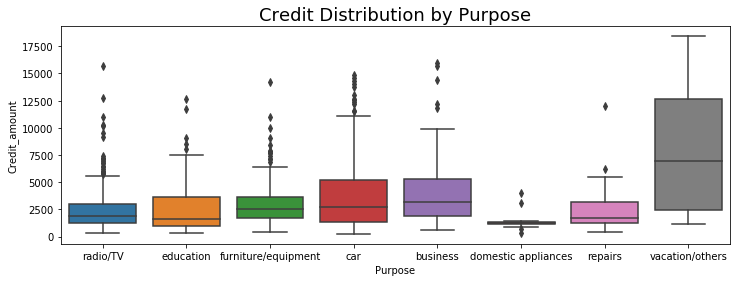

In [20]:
plt.figure(figsize=(12,4))
sns.boxplot(df.Purpose, df.Credit_amount)
plt.title('Credit Distribution by Purpose', size=18)

In [21]:
# Average loan based on Purpose

df.groupby('Purpose').Credit_amount.mean().sort_values(ascending=False)

Purpose
vacation/others        8209.333333
business               4158.041237
car                    3768.192878
furniture/equipment    3066.988950
education              2879.203390
repairs                2728.090909
radio/TV               2487.653571
domestic appliances    1498.000000
Name: Credit_amount, dtype: float64

### Credit Amount distribution based on Age, Sex, Housing separating by Risk

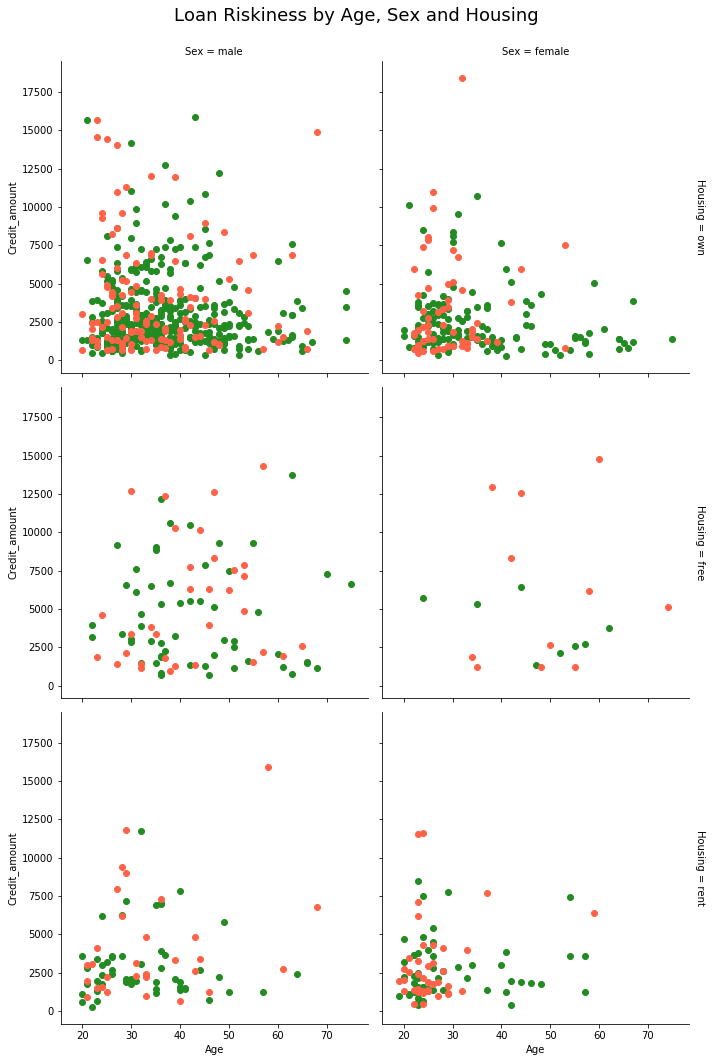

In [22]:
facet = sns.FacetGrid(df, 'Housing', 'Sex', hue='Risk', size=5, margin_titles=True, palette=['forestgreen', 'tomato'])
facet = facet.map(plt.scatter, 'Age','Credit_amount')
facet.fig.suptitle('Loan Riskiness by Age, Sex and Housing', size=18)
plt.subplots_adjust(top=.93)

**Some observations -**

- More **youth female customers with rent housing** applied for **more credit loans** and most of them **turned to bad risk**
- **Mostly loans** applied by the customers who **own the housing**

### Credit Amount distribution based on Loan Duration separating by Risk

Text(0.5, 1.0, 'Distribution of Credit Amount by Loan Duration along with Risk')

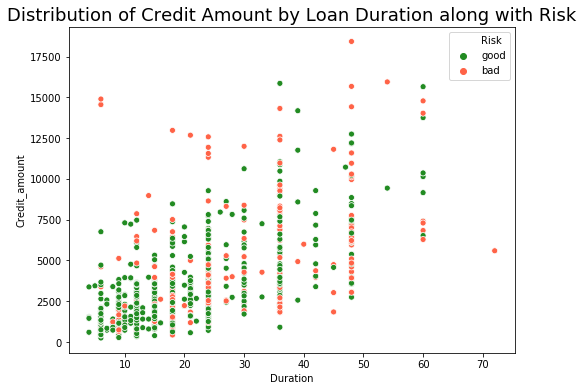

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.Duration, df.Credit_amount, hue=df.Risk, palette=['forestgreen', 'tomato'], edgecolor='w')
plt.title('Distribution of Credit Amount by Loan Duration along with Risk',size=18)

- **More the credit amount, higher the chances of borrowing turning bad**
- Similarly, **higher the duration, higher the probability of loan will turn out to be bad**

### Loan Amount distribution based by age

Text(0.5, 1.0, 'Distribution of Credit Amount by Age along with Risk')

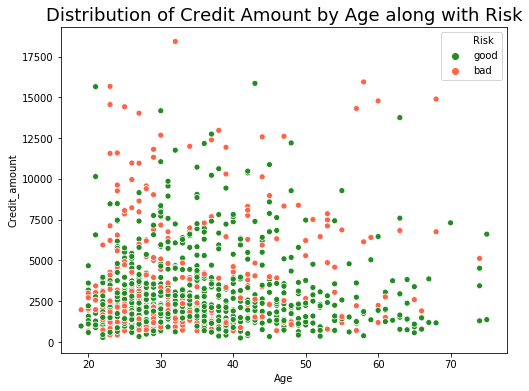

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.Age, df.Credit_amount, hue=df.Risk, palette=['forestgreen', 'tomato'], edgecolor='w')
plt.title('Distribution of Credit Amount by Age along with Risk',size=18)

- **probability of turning a loan bad is very low when borrowed by adults**
- **most of the loans applied by youth**
- **majority of the loans turned bad when credit amount > 8k for youth borrowings**

## <a id='PurposeDist'></a>4g. Let's have some statistics over Purpose Distribution

In [25]:
df.groupby('Purpose').Credit_amount.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Purpose,,,,,,,,
car,337.0,3768.192878,3123.594488,250.0,1364.00,2679.0,5248.00,14896.0
radio/TV,280.0,2487.653571,2073.693150,338.0,1261.00,1890.0,3038.00,15653.0
furniture/equipment,181.0,3066.988950,2034.146228,428.0,1747.00,2578.0,3643.00,14179.0
business,97.0,4158.041237,3231.484456,609.0,1908.00,3161.0,5293.00,15945.0
education,59.0,2879.203390,2883.916266,339.0,936.50,1597.0,3638.00,12612.0
repairs,22.0,2728.090909,2627.490364,454.0,1214.50,1749.0,3203.25,11998.0
domestic appliances,12.0,1498.000000,1012.510741,343.0,1131.25,1249.0,1359.50,3990.0
vacation/others,12.0,8209.333333,6112.703156,1164.0,2410.50,6948.0,12649.00,18424.0


- **Mostly** credit was given for **car** purpose and **least** for **vacation/others**
- **Highest Average** credit was given for **vacation/others** followed by car and lowest for domestic appliances
- Credit amount **hugely spanning for vacation/others purpose**
- **Highest credit** was for **vacation/others** and **lowest credit** for **domestic appliances**


## <a id='age_groups'></a>4h. Exploring any behavior based on age groups

Now let's understand the customers' borrowing on various age groups and dive deeper in our analysis to evaluate loan riskiness and try to guage if there is any pattern influenced by age groups

In [26]:
df.groupby('age_group').Credit_amount.describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
youth,371.0,3088.989218,2694.779719,276.0,1292.0,2214.0,3753.5,15672.0
adult,443.0,3465.577878,2834.645860,250.0,1503.0,2503.0,4338.5,18424.0
mid,141.0,3187.936170,3006.196081,338.0,1240.0,2134.0,3777.0,15945.0
senior,45.0,3122.066667,3108.587778,571.0,1255.0,1908.0,3757.0,14896.0


### Credit Amount Distribution with Risk factor pertaining to age_groups

Risk               bad         good
age_group                          
youth      3788.759124  2679.294872
adult      3705.879310  3380.333333
mid        5064.000000  2520.490385
senior     4512.800000  2724.714286


Text(0.5, 1.0, 'Credit Amount distibution amongst age groups along with Risk factor')

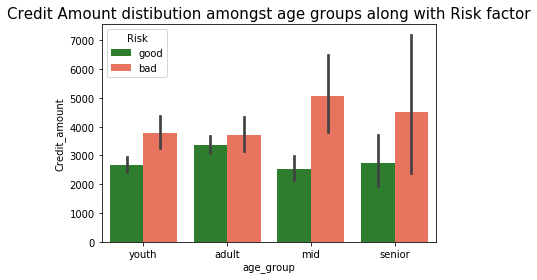

In [27]:
age_risk_mean = pd.crosstab(df.age_group, df.Risk, df.Credit_amount, aggfunc='mean')
print(age_risk_mean)

sns.barplot(df.age_group, df.Credit_amount, hue=df.Risk, palette=['forestgreen','tomato'])
plt.title('Credit Amount distibution amongst age groups along with Risk factor',size=15)

### Loan dispersed to age_groups along with their riskiness

Risk           bad     good      All
age_group                           
youth       519060   626955  1146015
adult       429882  1105369  1535251
mid         187368   262131   449499
senior       45128    95365   140493
All        1181438  2089820  3271258 

Risk            bad      good
age_group                    
youth      0.452926  0.547074
adult      0.280008  0.719992
mid        0.416837  0.583163
senior     0.321212  0.678788 

Risk            bad      good
age_group                    
youth      0.439346  0.300004
adult      0.363863  0.528930
mid        0.158593  0.125432
senior     0.038198  0.045633


Text(0.5, 1.0, 'How much loan given to age groups based on riskiness?')

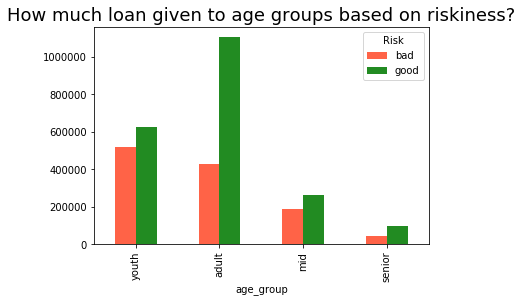

In [28]:
age_risk_sum = pd.crosstab(df.age_group, df.Risk, df.Credit_amount, aggfunc='sum', margins=True)
print(age_risk_sum,'\n')

age_risk_percent = pd.crosstab(df.age_group, df.Risk, df.Credit_amount, aggfunc='sum', normalize='index')
print(age_risk_percent,'\n')

print(pd.crosstab(df.age_group, df.Risk, df.Credit_amount, aggfunc='sum', normalize='columns'))

pd.crosstab(df.age_group, df.Risk,df.Credit_amount, aggfunc='sum').plot(kind='bar', color=['tomato','forestgreen'])
plt.title('How much loan given to age groups based on riskiness?',size=18)

- Approx. **45% loan** taken by **youth** customers were considered to be **high risky loans**
- Approx. **28% loan taken** by **adults** were considered as **high risk loans**
- Approx. **41.7% loan taken** by **mid-aged** customers were considered to be **high risky loans**
- Approx. **32% loan taken** by **senior** people were considered **high risk loans**
---
- **Adult** holds the **highest ratio in less risky loans** however senior holds reverse.
- **Youth** holds the **highest ratio in high risky loans** however senior holds reverse.
---
<font color='blue'><u>***Note</u>:*** ***Matter of the fact is senior people are dependent on pensions and youth of early age may not have employment***

## <a id='ca'></a>4i. Checking account

Text(0.5, 1.0, 'Checking Account distribution considering Risk factor')

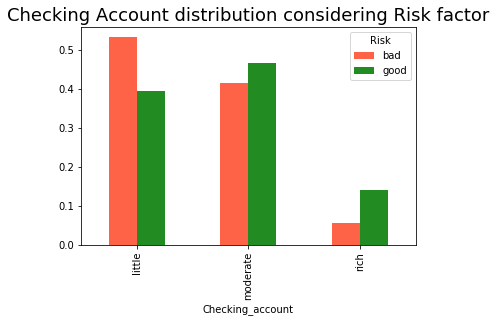

In [29]:
pd.crosstab(df.Checking_account, df.Risk, normalize='columns').plot(kind='bar', color=['tomato','forestgreen'])
plt.title('Checking Account distribution considering Risk factor', size=18)

- Customers related to **little wealth group** had a **higher probability of being bad risk loans** than other groups
- **Higher the wealth, lower the probability of being bad risk loans**

## <a id='PurposeRisk'></a>4j. Purpose with risk factor

Risk                      bad      good       All
Purpose                                          
business             0.058437  0.064858  0.123295
car                  0.136806  0.251388  0.388193
domestic appliances  0.001921  0.003574  0.005495
education            0.022161  0.029768  0.051929
furniture/equipment  0.064635  0.105062  0.169698
radio/TV             0.052693  0.160235  0.212928
repairs              0.006826  0.011521  0.018347
vacation/others      0.017678  0.012436  0.030114
All                  0.361157  0.638843  1.000000


Text(0.5, 1.0, 'Which Purpose carried high risk?')

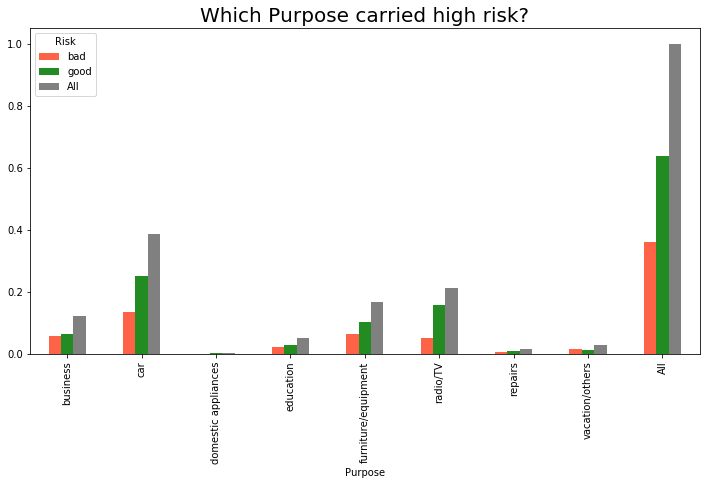

In [30]:
purpose_w_risk = pd.crosstab(df.Purpose, df.Risk, df.Credit_amount, aggfunc='sum', normalize=True, margins=True)

print(purpose_w_risk)

purpose_w_risk.plot(kind='bar', color=['tomato','forestgreen','gray'], figsize=(12,6))
plt.title('Which Purpose carried high risk?',size=20)

- **Majority of the loans** given for **car purpose** followed by radio/TV
- **Most of the loans turn bad for vacation/others** followed by business purpose
- **Car followed by radio/TV purposes were less risky** from operation perspective given it has the **widest gap between good and the bad risk**

## <a id='sa'></a>4k. Exploring Saving Accounts

Text(0.5, 1.0, 'Job distribution among Saving Accounts')

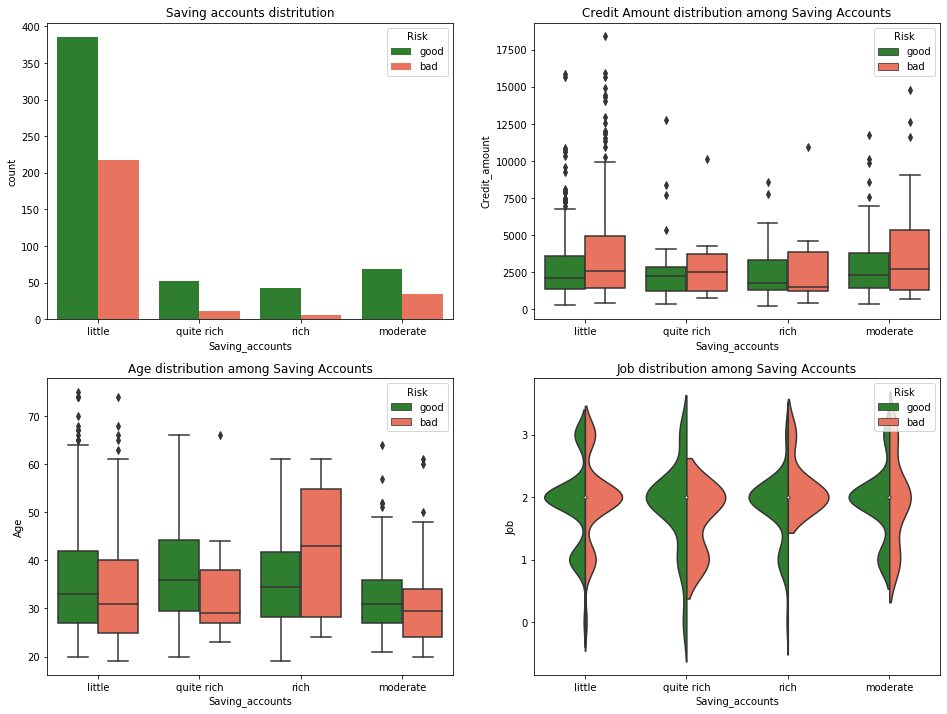

In [31]:
fig, ax = plt.subplots(2,2, figsize=(16,12))

sns.countplot(df.Saving_accounts, hue=df.Risk, palette=['forestgreen','tomato'], ax=ax[0,0])
ax[0,0].set_title('Saving accounts distritution', size=12)

sns.boxplot(df.Saving_accounts, df.Credit_amount, hue=df.Risk, palette=['forestgreen','tomato'],ax=ax[0,1])
ax[0,1].set_title('Credit Amount distribution among Saving Accounts', size=12)


sns.boxplot(df.Saving_accounts, df.Age, hue=df.Risk, palette=['forestgreen','tomato'],ax=ax[1,0])
ax[1,0].set_title('Age distribution among Saving Accounts', size=12)


sns.violinplot(df.Saving_accounts, df.Job, hue=df.Risk, split=True, palette=['forestgreen','tomato'],ax=ax[1,1])
ax[1,1].set_title('Job distribution among Saving Accounts', size=12)

- **Majority of the customers applied for loan** who are having **little saving accounts** and **rich being the lowest**; that's perfectly makes sense!!
- On average, **Rich customers has the lowest amongst all saving accounts.**
- **little saving accounts customers are spanning all ages**
- Loan given to **rich customers with 1 or less jobs** turned to be **good**
- Loan given to **quite rich segment with 2 or more jobs** turned to be **good**

## <a id='duration'></a>4l. Loan Duration distribution and density

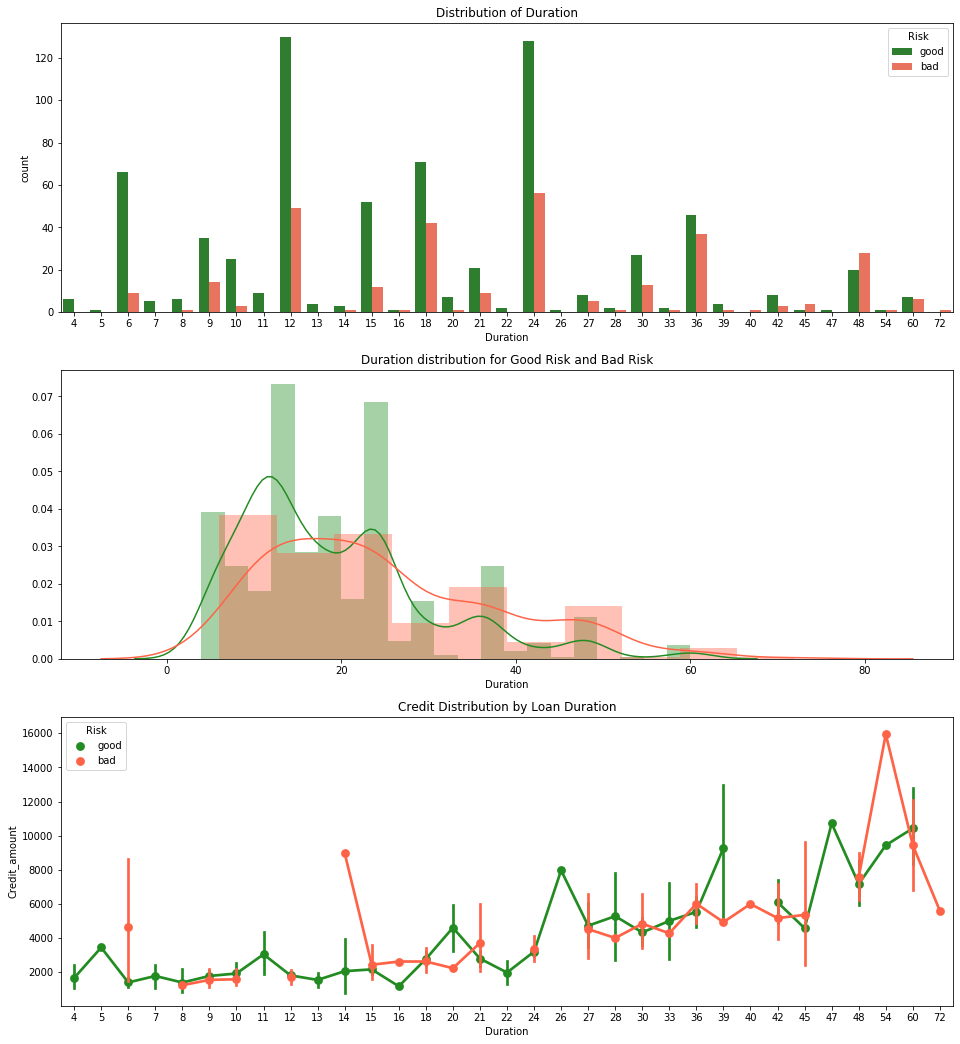

In [32]:
fig, ax = plt.subplots(3,1, figsize=(16,14))

sns.countplot(df.Duration, hue=df.Risk, palette=['forestgreen','tomato'],ax=ax[0])
ax[0].set_title('Distribution of Duration', size=12)

sns.distplot(df.Duration[df.Risk=='good'], color='forestgreen',ax=ax[1])
sns.distplot(df.Duration[df.Risk=='bad'], color='tomato',ax=ax[1])
ax[1].set_title('Duration distribution for Good Risk and Bad Risk', size=12)

sns.pointplot(df.Duration, df.Credit_amount, hue=df.Risk, palette=['forestgreen','tomato'],ax=ax[2])
ax[2].set_title('Credit Distribution by Loan Duration', size=12)
plt.subplots_adjust(top=1.10)

- **Mostly loans** taken for **12 months, 18 months and 24 months**
- Seems; **longer duration loans turned out to be bad** however short duration loans are at good risk

# <a id='corr'></a>5. Correlation

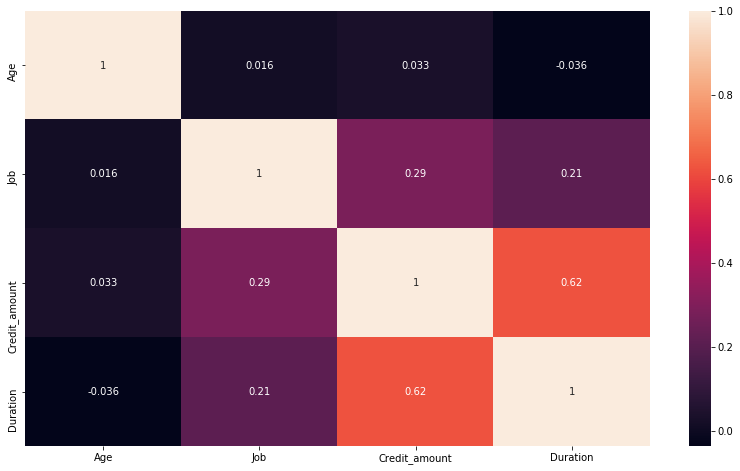

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)

- **Credit Amount, Duration, radio/TV, own housing are correlated with target variable**
- **Credit amount and duration** are **highly positively correlated**
- **Sex_male** is **positively correlated** with **aged_group_mid** and **negatively correlated** with **rent housing**

# <a id='preprocessing'></a>6. Data Preprocessing

## <a id='drop'></a>6a. Dropping unwanted features

In [34]:
# Drop saving accounts and checking account as these features carries much of null values

df.drop(['Age','Saving_accounts', 'Checking_account'], axis=1, inplace=True)

## <a id='encoding'></a>6b. Applying encoding techniques

In [35]:
# Lets apply encoding using get_dummies method

df = pd.get_dummies(df, drop_first=True)

In [36]:
df.head()

,Job,Credit_amount,Duration,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good,age_group_adult,age_group_mid,age_group_senior
0,2,1169,6,1,1,0,0,0,0,0,1,0,0,1,0,0,1
1,2,5951,48,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2096,12,1,1,0,0,0,1,0,0,0,0,1,0,1,0
3,2,7882,42,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,2,4870,24,1,0,0,1,0,0,0,0,0,0,0,0,1,0


### Rearranging the Risk_good feature as last column. Just to ease the process

In [37]:
# Securing Risk_good
Risk_good = df.Risk_good

# Dropping Risk_good
df.drop('Risk_good', axis=1, inplace=True)

# Joining back to get it as last feature
df = df.join(Risk_good)

### Change the data type of features to integar

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Job                          1000 non-null   int64
 1   Credit_amount                1000 non-null   int64
 2   Duration                     1000 non-null   int64
 3   Sex_male                     1000 non-null   uint8
 4   Housing_own                  1000 non-null   uint8
 5   Housing_rent                 1000 non-null   uint8
 6   Purpose_car                  1000 non-null   uint8
 7   Purpose_domestic appliances  1000 non-null   uint8
 8   Purpose_education            1000 non-null   uint8
 9   Purpose_furniture/equipment  1000 non-null   uint8
 10  Purpose_radio/TV             1000 non-null   uint8
 11  Purpose_repairs              1000 non-null   uint8
 12  Purpose_vacation/others      1000 non-null   uint8
 13  age_group_adult              1000 non-null   uint

In [39]:
# Converting data type to int for all features

for i in df.columns:
    df[i] = df[i].astype('int')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Job                          1000 non-null   int32
 1   Credit_amount                1000 non-null   int32
 2   Duration                     1000 non-null   int32
 3   Sex_male                     1000 non-null   int32
 4   Housing_own                  1000 non-null   int32
 5   Housing_rent                 1000 non-null   int32
 6   Purpose_car                  1000 non-null   int32
 7   Purpose_domestic appliances  1000 non-null   int32
 8   Purpose_education            1000 non-null   int32
 9   Purpose_furniture/equipment  1000 non-null   int32
 10  Purpose_radio/TV             1000 non-null   int32
 11  Purpose_repairs              1000 non-null   int32
 12  Purpose_vacation/others      1000 non-null   int32
 13  age_group_adult              1000 non-null   int3

## <a id='scaling'></a>6c. Scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler

to_be_scaled = df.drop('Risk_good', axis=1)

scale = StandardScaler()
scaled_data = scale.fit_transform(to_be_scaled)

# Designing a dataframe

scaled_df = pd.DataFrame(scaled_data, columns=to_be_scaled.columns)
scaled_df = scaled_df.join(df.loc[:, 'Risk_good'])

In [42]:
scaled_df.head()

,Job,Credit_amount,Duration,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,age_group_adult,age_group_mid,age_group_senior,Risk_good
0,0.146949,-0.745131,-1.236478,0.670280,0.634448,-0.466933,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-0.891814,-0.405147,4.606758,1
1,0.146949,0.949817,2.248194,-1.491914,0.634448,-0.466933,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208,-0.891814,-0.405147,-0.217072,0
2,-1.383771,-0.416562,-0.738668,0.670280,0.634448,-0.466933,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208,-0.891814,2.468238,-0.217072,1
3,0.146949,1.634247,1.750384,0.670280,-1.576173,-0.466933,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208,1.121310,-0.405147,-0.217072,1
4,0.146949,0.566664,0.256953,0.670280,-1.576173,-0.466933,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208,-0.891814,2.468238,-0.217072,0


## <a id='Xy'></a>6d. Define X and y

In [43]:
X = scaled_df.drop('Risk_good', axis=1)
y = scaled_df.Risk_good

## <a id='split'></a>6e. Splitting data into train and test

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 16)
(250, 16)
(750,)
(250,)


# <a id='algo'></a>7. Applying some classification algorithms

## <a id='logit'></a><font color='crimson'>7a. Logistic Regression

In [46]:
# importing ML algorithm
from sklearn.linear_model import LogisticRegression

# importing accuracy metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, auc, f1_score

# calling model and fitting the training data

logit = LogisticRegression()
logit.fit(X_train, y_train)

# predictions
y_pred = logit.predict(X_test)

# accuracy and classification report
print('Logit Accuracy: ',accuracy_score(y_test, y_pred))
print('-'*50)
print(classification_report(y_test, y_pred))

Logit Accuracy:  0.696
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.19      0.27        72
           1       0.73      0.90      0.81       178

    accuracy                           0.70       250
   macro avg       0.59      0.55      0.54       250
weighted avg       0.65      0.70      0.65       250



<font color='dodgerblue'>**AUC & ROC Curve**

0.5658551810237202


Text(0.5, 1.0, 'ROC for Bad Risk')

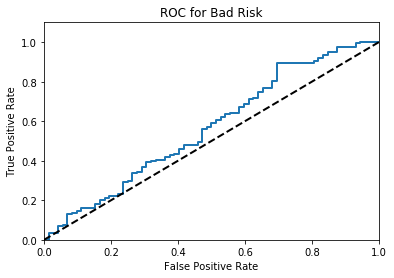

In [47]:
fpr, tpr, thresh = roc_curve(y_test, logit.predict_proba(X_test)[:,1])

ROC_AUC = auc(fpr, tpr)
print(ROC_AUC)

plt.plot(fpr, tpr, label='ROC Curve (area=%.2f)' %ROC_AUC, linewidth=2)
plt.plot([0,1],[0,1], 'k--', linewidth=2)
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Bad Risk')

<font color='dodgerblue'>**Precision Recall Curve**

Text(0.5, 1.0, 'Precision Recall Curve for Bad Risk')

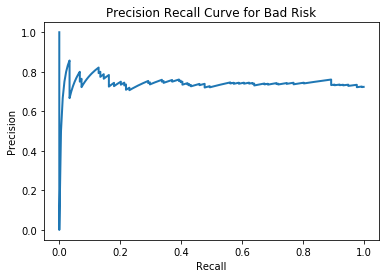

In [48]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresh = precision_recall_curve(y_test, logit.predict_proba(X_test)[:,1])

PR_AUC = auc(recall, precision)

plt.plot(recall, precision, label='PR curve (area=%.2f)'%PR_AUC, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Bad Risk')

### Using Cross Validation

In [49]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

logit_accuracies = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv, n_jobs=-1)

print(logit_accuracies)
print(logit_accuracies.mean())

[0.7287234  0.69148936 0.69148936 0.70212766 0.74468085 0.68085106
 0.72340426 0.68617021 0.72340426 0.67021277]
0.7042553191489362


### Applying Grid SearchCV to find the best parameters

In [50]:
# Grid SearchCV

params = {'C':[0.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
         'penalty':['l1','l2']}

grid = GridSearchCV(logit, param_grid=params, cv=cv, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7074468085106385
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.1, 'penalty': 'l2'}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [51]:
grid_logit = grid.best_estimator_
print('grid_logit',grid_logit.score(X_train, y_train))

grid_logit 0.7213333333333334


### Applying Randomized SearchCV to find the best parameters

In [52]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25)

grid = RandomizedSearchCV(logit, param_distributions=params, n_iter=10, scoring='accuracy', 
                             n_jobs=-1, cv=cv, random_state=42)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6952127659574467
LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'penalty': 'l2', 'C': 0.3}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [53]:
rand_logit = grid.best_estimator_
print('rand_logit:',rand_logit.score(X_train, y_train))

rand_logit: 0.7226666666666667


## <a id='knn'></a><font color='crimson'>7b. K-Nearest Neighbors

### Applying Grid SearchCV to find the best parameters

In [54]:
# Using Grid SearchCV

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param = {'n_neighbors':range(31),
        'weights':['uniform','distance']}


grid = GridSearchCV(knn, param_grid=param, cv=cv, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7015957446808511
{'n_neighbors': 28, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [55]:
grid_knn = grid.best_estimator_
print('grid_knn: ', grid_knn.score(X_train, y_train))

grid_knn:  0.716


### Applying Randomized SearchCV to find the best parameters

In [56]:
# Using Randomized SearchCV

grid = RandomizedSearchCV(knn, param_distributions=param, cv=cv, n_iter=10, random_state=42, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7042553191489361
{'weights': 'uniform', 'n_neighbors': 28}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [57]:
rand_knn = grid.best_estimator_
print('rand_knn: ',rand_knn.score(X_train, y_train))

rand_knn:  0.716


## <a id='nb'></a><font color='crimson'>7c. Gaussian Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB 

In [59]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_train)

score = accuracy_score(y_train, y_pred)
print('Gaussian: ', score)

Gaussian:  0.6826666666666666


In [60]:
confusion_matrix(y_train, y_pred)

array([[ 90, 138],
       [100, 422]], dtype=int64)

In [61]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       228
           1       0.75      0.81      0.78       522

    accuracy                           0.68       750
   macro avg       0.61      0.60      0.61       750
weighted avg       0.67      0.68      0.67       750



## <a id='tree'></a><font color='crimson'>7d. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()

max_depth = range(1,21)
criterion = ['entropy','gini']

param = {'max_depth':max_depth,
         'criterion':criterion}

cv = StratifiedShuffleSplit(n_splits=20, random_state=42, test_size=0.25)

### Applying Grid SearchCV to find the best parameters

In [63]:
grid = GridSearchCV(d_tree, param_grid=param, cv=cv, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.708244680851064
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': 3}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [64]:
grid_tree = grid.best_estimator_
print('grid_tree: ',grid_tree.score(X_train, y_train))

grid_tree:  0.736


### Applying Randomized SearchCV to find the best parameters

In [65]:
grid = RandomizedSearchCV(d_tree, param_distributions=param, n_iter=20, n_jobs=-1, random_state=42, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7061170212765957
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'max_depth': 5, 'criterion': 'gini'}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [66]:
rand_tree = grid.best_estimator_
print('rand_tree: ',rand_tree.score(X_train, y_train))

rand_tree:  0.776


## <a id='forest'></a><font color='crimson'>7e. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

n_estimators = range(100, 660, 50)
criterion = ['gini', 'entropy']
max_depth = range(1, 21)
bootstrap = [True, False]

param = {'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'bootstrap': bootstrap}

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=42)

### Applying Randomized SearchCV to find the best parameters

In [68]:
grid = RandomizedSearchCV(forest, param_distributions=param, n_iter=10, n_jobs=-1, random_state=42, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7047872340425532
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'n_estimators': 200, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [69]:
rand_forest = grid.best_estimator_
print('rand_forest: ',rand_forest.score(X_train, y_train))

rand_forest:  0.8413333333333334


<font color='dodgerblue'>**Confusion Matrix**

In [70]:
confusion_matrix(y_train, rand_forest.predict(X_train))

array([[109, 119],
       [  0, 522]], dtype=int64)

<font color='dodgerblue'>**Classfication Report**

In [71]:
print(classification_report(y_train, rand_forest.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       228
           1       0.81      1.00      0.90       522

    accuracy                           0.84       750
   macro avg       0.91      0.74      0.77       750
weighted avg       0.87      0.84      0.82       750



## <a id='xgboost'></a><font color='crimson'>7f. XGBoost

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

param = {'n_estimators':range(100, 660, 50),
         'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'max_depth':range(1,21,1),
         'min_child_weight':range(1,4,1)}

### Applying Randomized SearchCV to find the best parameters

In [73]:
grid = RandomizedSearchCV(xgb, param_distributions=param, cv=cv, n_iter=10, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6779255319148936
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=1, min_child_weight=3, missing=None,
              n_estimators=650, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
{'n_estimators': 650, 'min_child_weight': 3, 'max_depth': 1, 'learning_rate': 1}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [74]:
rand_xgb = grid.best_estimator_
print('rand_xgb:', rand_xgb.score(X_train, y_train))

rand_xgb: 0.8013333333333333


## <a id='bagging'></a><font color='crimson'>7g. Bagging Classifier

In [75]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()

n_estimators = range(100, 660, 50)
bootstrap = [True, False]

param = {'n_estimators': n_estimators,
        'bootstrap': bootstrap}

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=42)

### Applying Randomized SearchCV to find the best parameters

In [76]:
grid = RandomizedSearchCV(bag, param_distributions=param, cv=cv, n_iter=10, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6856382978723403
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=500,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
{'n_estimators': 500, 'bootstrap': True}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [77]:
rand_bag = grid.best_estimator_
print('rand_bag:', rand_bag.score(X_train, y_train))

rand_bag: 1.0


## <a id='ada'></a><font color='crimson'>7h. AdaBoost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

n_estimators = range(100, 660, 50)
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

param = {'n_estimators': n_estimators,
        'learning_rate': learning_rate}

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=42)

### Applying Randomized SearchCV to find the best parameters

In [79]:
grid = RandomizedSearchCV(ada, param_distributions=param, cv=cv, n_iter=10, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7066489361702128
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=150, random_state=None)
{'n_estimators': 150, 'learning_rate': 0.1}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [80]:
rand_ada = grid.best_estimator_
print('rand_ada:', rand_ada.score(X_train, y_train))

rand_ada: 0.7266666666666667


## <a id='xtra'></a><font color='crimson'>7i. Extra Tree Classifier

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

n_estimators = range(100, 660, 50)
criterion = ['gini', 'entropy']
max_depth = range(1, 21)
bootstrap = [True, False]

param = {'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'bootstrap': bootstrap}

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=42)

### Applying Randomized SearchCV to find the best parameters

In [82]:
grid = RandomizedSearchCV(extra_tree, param_distributions=param, n_iter=10, n_jobs=-1, random_state=42, 
                          cv=cv, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.701063829787234
ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=8, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
{'n_estimators': 200, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}


<font color='dodgerblue'>**Model Accuracy on best parameters**

In [83]:
rand_extra_tree = grid.best_estimator_
print('rand_extra_tree: ',rand_extra_tree.score(X_train, y_train))

rand_extra_tree:  0.8213333333333334


## <a id='voting'></a><font color='crimson'>7j. Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('rand_logit',  rand_logit),
    ('gaussian',  gaussian),
    ('rand_knn',  rand_knn),
    ('rand_tree',  rand_tree),
    ('rand_forest',  rand_forest),
    ('rand_xgb',  rand_xgb),
    ('rand_ada',  rand_ada)], voting='hard')

voting_classifier = voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)

score = accuracy_score(y_test, y_pred)

print('voting:', score)

voting: 0.716


## <a id='compare'></a><font color='crimson'>7k. Comparing algorithms accuracy and Selecing the best model

In [85]:
all_models = [rand_logit, gaussian, rand_knn, rand_tree, rand_forest, rand_xgb, rand_ada, rand_extra_tree, voting]

c = {}    # saving the algorithms and their accuracy in key value pair

for i in all_models:
    pred = i.predict(X_train)
    score = accuracy_score(y_train, pred)
    c[i] = score

In [86]:
models_str = ['rand_logit','gaussian','rand_knn','rand_tree','rand_forest','rand_xgb','rand_ada','rand_extra_tree','voting']

info = []
for i, n in zip(models_str, c.values()):
    info.append((i,round(n,4)))

In [87]:
info

[('rand_logit', 0.7227),
 ('gaussian', 0.6827),
 ('rand_knn', 0.716),
 ('rand_tree', 0.776),
 ('rand_forest', 0.8413),
 ('rand_xgb', 0.8013),
 ('rand_ada', 0.7267),
 ('rand_extra_tree', 0.8213),
 ('voting', 0.7627)]

# <a id='save'></a>8. Finalyzing the model

Saving the final model of the highest accuracy

In [88]:
all_models

[LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                      weights='uniform'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')

In [89]:
test_pred = (max(c, key=c.get)).predict(X_test)

In [90]:
# XGB algorithm produces the highest Accuracy amongst all algorithms 

my_model = max(c, key=c.get)
my_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
# Make the prediction

y_pred = my_model.predict(X_test)

In [92]:
print('Score: ', accuracy_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

Score:  0.7 

[[ 10  62]
 [ 13 165]] 

              precision    recall  f1-score   support

           0       0.43      0.14      0.21        72
           1       0.73      0.93      0.81       178

    accuracy                           0.70       250
   macro avg       0.58      0.53      0.51       250
weighted avg       0.64      0.70      0.64       250



### ***Above model was giving 84% accuracy on training set but very poor performance on test data (70% accuracy). There is a scope of overfitting hence need to deep dive for regularization techniques***

# Overfitting Problem

In [93]:
from sklearn.linear_model import LassoCV, ElasticNetCV

In [94]:
import joblib

joblib.dump(my_model, 'my_model.pkl')

['my_model.pkl']

In [95]:
model_loaded = joblib.load('my_model.pkl')

In [96]:
stop_time = time.time()

print('Time Taken (in minutes) :', (stop_time-start_time)/60)

Time Taken (in minutes) : 6.601987938086192


<font style = 'float:right'>❤️ Rachit Saxena